In [1]:
#necessary liberaries to use

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import scipy
from scipy import stats
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import statsmodels.formula.api as smf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Populating the interactive namespace from numpy and matplotlib


In [2]:
#importing data

full = pd.read_excel('ADS_CombinedData.xls')
full.head()

,Precinct,TotPop,Male,Female,White,Black,AmInd,Asian,NatHw,Others,MaleBelow25,MaleTill70,FemaleBelow25,FemaleTill70,MedInc,MeanInc,Schools,Crime
0,1,110725,58169,52556,55650,23616,723,14394,206,19434,14611,15447,16874,17966,1341895,1881114,25,1416
1,5,96086,48075,48011,39782,15685,652,27922,233,14778,0,0,0,0,369163,623981,22,980
2,6,94049,44317,49732,34658,28724,932,4759,212,28977,2611,2881,3527,3905,452071,604749,22,1703
3,7,89387,43185,46202,32817,14219,866,27509,362,17184,11489,11822,11457,11878,444043,677319,18,711
4,9,117212,54860,62352,56413,28913,1450,13780,455,21783,16450,17667,20281,21811,947773,1431586,28,1424


In [3]:
data = pd.read_csv('data.csv')
data.head()

,A,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y
0,1,110725,58169,52556,55650,23616,723,14394,206,19434,14611,15447,16874,17966,1341895,1881114,25,1416
1,5,96086,48075,48011,39782,15685,652,27922,233,14778,0,0,0,0,369163,623981,22,980
2,6,94049,44317,49732,34658,28724,932,4759,212,28977,2611,2881,3527,3905,452071,604749,22,1703
3,7,89387,43185,46202,32817,14219,866,27509,362,17184,11489,11822,11457,11878,444043,677319,18,711
4,9,117212,54860,62352,56413,28913,1450,13780,455,21783,16450,17667,20281,21811,947773,1431586,28,1424


In [4]:
#Normalizing by total population

data.X2 = data.X2/data.X1
data.X3 = data.X3/data.X1
data.X4 = data.X4/data.X1
data.X5 = data.X5/data.X1
data.X6 = data.X6/data.X1
data.X7 = data.X7/data.X1
data.X8 = data.X8/data.X1
data.X9 = data.X9/data.X1
data.X10= data.X10/data.X1
data.X11 = data.X11/data.X1
data.X12 = data.X12/data.X1
data.X13 = data.X13/data.X1
data.head()

,A,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,Y
0,1,110725,0.525347,0.474653,0.502597,0.213285,0.006530,0.129998,0.001860,0.175516,0.131958,0.139508,0.152396,0.162258,1341895,1881114,25,1416
1,5,96086,0.500333,0.499667,0.414025,0.163239,0.006786,0.290594,0.002425,0.153800,0.000000,0.000000,0.000000,0.000000,369163,623981,22,980
2,6,94049,0.471212,0.528788,0.368510,0.305415,0.009910,0.050601,0.002254,0.308105,0.027762,0.030633,0.037502,0.041521,452071,604749,22,1703
3,7,89387,0.483124,0.516876,0.367134,0.159072,0.009688,0.307752,0.004050,0.192243,0.128531,0.132256,0.128173,0.132883,444043,677319,18,711
4,9,117212,0.468041,0.531959,0.481290,0.246673,0.012371,0.117565,0.003882,0.185843,0.140344,0.150727,0.173028,0.186082,947773,1431586,28,1424


In [5]:
#Splitting into training and validation

train = data[0:40]
valid = data[41:78]

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     1.666
Date:                Mon, 23 Nov 2015   Prob (F-statistic):              0.128
Time:                        12:11:27   Log-Likelihood:                -297.16
No. Observations:                  40   AIC:                             626.3
Df Residuals:                      24   BIC:                             653.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X1             0.0010      0.005      0.195      0.8

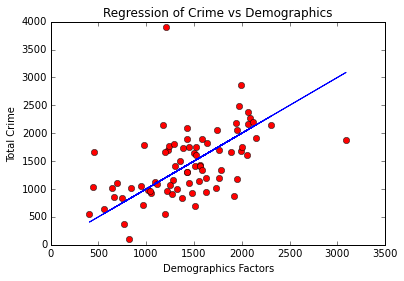

In [6]:
#Multivariate regression

lm = smf.ols(formula='Y~X1+X2+X3+X4+X5+X6+X7+X8+X9+X10+X11+X12+X13+X14+X15+X16-1', data = train).fit()
print(lm.summary())
lmy1 = lm.predict(data)
plt.xlabel('Demographics Factors')
plt.ylabel('Total Crime')
plt.title('Regression of Crime vs Demographics')
plt.plot(lmy1,data.Y,'or')
plt.plot(lmy1,lmy1,'-b')

1.11295680696


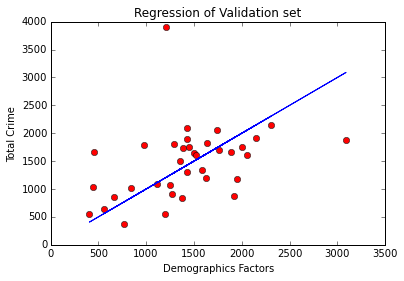

In [7]:
lmy2 = lm.predict(valid)
plt.xlabel('Demographics Factors')
plt.ylabel('Total Crime')
plt.title('Regression of Validation set')
plt.plot(lmy2,valid.Y,'or')
plt.plot(lmy2,lmy2,'-b')
R2=(sum(pow(lmy2-valid.Y,2))/sum(pow(valid.Y-mean(valid.Y),2)))
print(R2)

####Conclusions from regression: The regression shows that there is definitely some correlation between regressors and crime but due to collinearity we cannot tell which factors have a greater impact.

In [8]:
#Feature selection

def regress(mask):
    formstr='Y~-1'
    for i in range(0,len(mask)):
        if mask[i]==1:
            formstr=formstr+'+X'+str(i+1)
    lm = smf.ols(formula=formstr, data = train).fit()
    lmy2 = lm.predict(valid)
    R2=1-sum(pow(lmy2-valid.Y,2))/sum(pow(valid.Y-mean(valid.Y),2))
    #R2=1-sum(pow(lmy2-valid.Y,2))*(n-1)/sum(pow(valid.Y-mean(valid.Y),2))/(n-sum(mask)-1)
    return (R2,lm)   

n=16
mask0=[0]*n #initially none of the regressors are included
r20=0
while True:
    bestI=-1 #best regressor to exclude
    for i in range(0,n):
        if (mask0[i]==0):
             mask=mask0[:]
             mask[i]=1
             r2=regress(mask)[0]
             #print((i,r2,r20))
             if (r2>r20):
                 r20=r2
                 bestI=i
    if (bestI>=0):
        mask0[bestI]=1
        print((bestI,r20))
    else:
        break
(r2,lm)= regress(mask0)
lm.summary()

(2, 0.033116218523062235)
(0, 0.29793862435701945)
(3, 0.4215960970617898)
(7, 0.4228780794714897)
(6, 0.42366679677485064)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     55.01
Date:                Mon, 23 Nov 2015   Prob (F-statistic):           1.36e-15
Time:                        12:11:33   Log-Likelihood:                -307.05
No. Observations:                  40   AIC:                             624.1
Df Residuals:                      35   BIC:                             632.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X1             0.0036      0.002      2.360      0.024         0.001     0.007
X3          2354.8238    684.814      3.439      0.002       964.577  3745.071
X4          -797.0616    714.855     -1.115      0.272     -2248.295   654.172
X7           555.7551   1398.018      0.398      0.693     -2282.372  3393.882
X8         -3.637e+04   8.41e+04     -0.432      0.668     -2.07e+05  1.34e+05
==============================================================================
Omnibus:                        6.051   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.049   Jarque-Bera (JB):                4.910
Skew:                           0.618   Prob(JB):                       0.0859
Kurtosis:                       4.191   Cond. No.                     1.41e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####Conclusion from feature selection: The features with greatest impact are X1, X3, X4, X7, X8 which are total population, number of women, number of white people, number of asians and number of native hawaiians. 

2 clusters: 0.661560390935
3 clusters: 0.56020484212
4 clusters: 0.565315053577
5 clusters: 0.540953436832
6 clusters: 0.544364027183
7 clusters: 0.547885379892
8 clusters: 0.542516073222
9 clusters: 0.513509335321
10 clusters: 0.505698545847
Best for 2 clusters: 0.661560390935


C:\Users\Neil\Anaconda\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


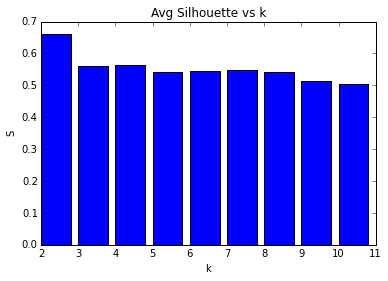

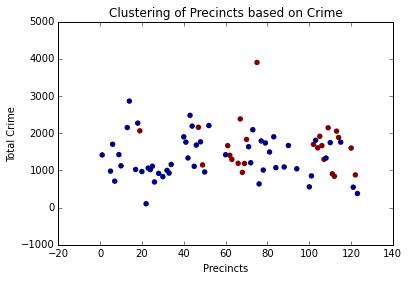

In [9]:
#K-Means clustering

s=[0]*9
for k in range(0,9):
    est=KMeans(n_clusters=k+2,n_init=25)
    est.fit(data)
    s[k]=silhouette_score(data, est.labels_)
    print('{0} clusters: {1}'.format(k+2,s[k]))
k=np.argmax(s)    
est=KMeans(n_clusters=k+2,n_init=100)
est.fit(data)
labels=est.labels_
plt.figure()
plt.bar(range(2,11),s)
plt.xlabel('k')
plt.ylabel('S')
plt.title('Avg Silhouette vs k')
print('Best for {0} clusters: {1}'.format(k+2,silhouette_score(data, labels)))
plt.figure()
plt.xlabel('Precincts')
plt.ylabel('Total Crime')
plt.title('Clustering of Precincts based on Crime')
plt.scatter(data.A,data.Y,s=30,c=labels.astype(np.float),lw=0)

####Conclusions from clustering: Optimum clusters is 2 but visually it is hard to distinguish which means that no precincts show distinctively similar features or characteristics.

[  1.03041301e-07   2.42203284e-06  -8.75917207e-03   7.31023197e-02
   5.87278259e-01   2.18316170e-01  -1.22553177e-02  -4.20917011e-01
  -2.34135769e-01   6.04695847e-01  -6.36243539e-02  -1.12106425e-02
  -4.75588920e-03   5.21946758e-03  -2.74243175e-04   3.73161668e-05
   1.45030654e-12]
0.999999999999


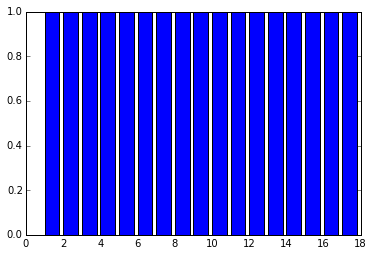

In [12]:
Y = np.matrix(data.Y)
X1 = data.drop('Y', 1)
#X2 = data.drop('A', 1)
X = np.matrix(X1)
m = mean(X,0)
s = std(X,0)
X2 = 1.0*np.array(X)
for i in xrange(0,9):
    X2[:,i]=(X2[:,i]-m[0,i])/s[0,i]

U, s, Vt = np.linalg.svd(X2) #singular value decomposition
V = Vt.T
#sort singular values
ind = np.argsort(s)[::-1] 
U = U[:, ind]
s = s[ind]
V = V[:, ind]
S = np.diag(s)
P=X2*np.matrix(V)
print (V[0])

sc=cumsum(s**2/sum(s**2))
plt.bar(range(1,(len(sc)+1)),sc)
print(sc[2])

####Conclusion from PCA: Though individually no factors have a significant impact on crime rate, the combination of all factors fully affects the crime rate in a precinct.